In [80]:
from Project_utils import *
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import seaborn as sns
from scipy.special import logsumexp
%matplotlib notebook

In [211]:
class demo_mcmc():
    def __init__(self, xs):
        self.xs = xs
    def animate_moving_cluster(self):
        def animate(i):
            ax = fig.add_subplot(1, 1, 1)    
            ax.set_title('num=%d' % i)
            ax.set_xlim(-13, 13)
            ax.set_ylim(-1, 3)
            ax.scatter(x=self.xs[i*10:(i+1)*10,0], y=self.xs[i*10:(i+1)*10,1], color="r", s=13)
        fig = plt.figure(figsize=(8,4))
        plt.grid(color='grey', linestyle='-', linewidth=0.3)
        ani = animation.FuncAnimation(fig, animate, frames=self.xs.shape[0], repeat=False, interval=1, cache_frame_data=False)
        return ani

<IPython.core.display.Javascript object>


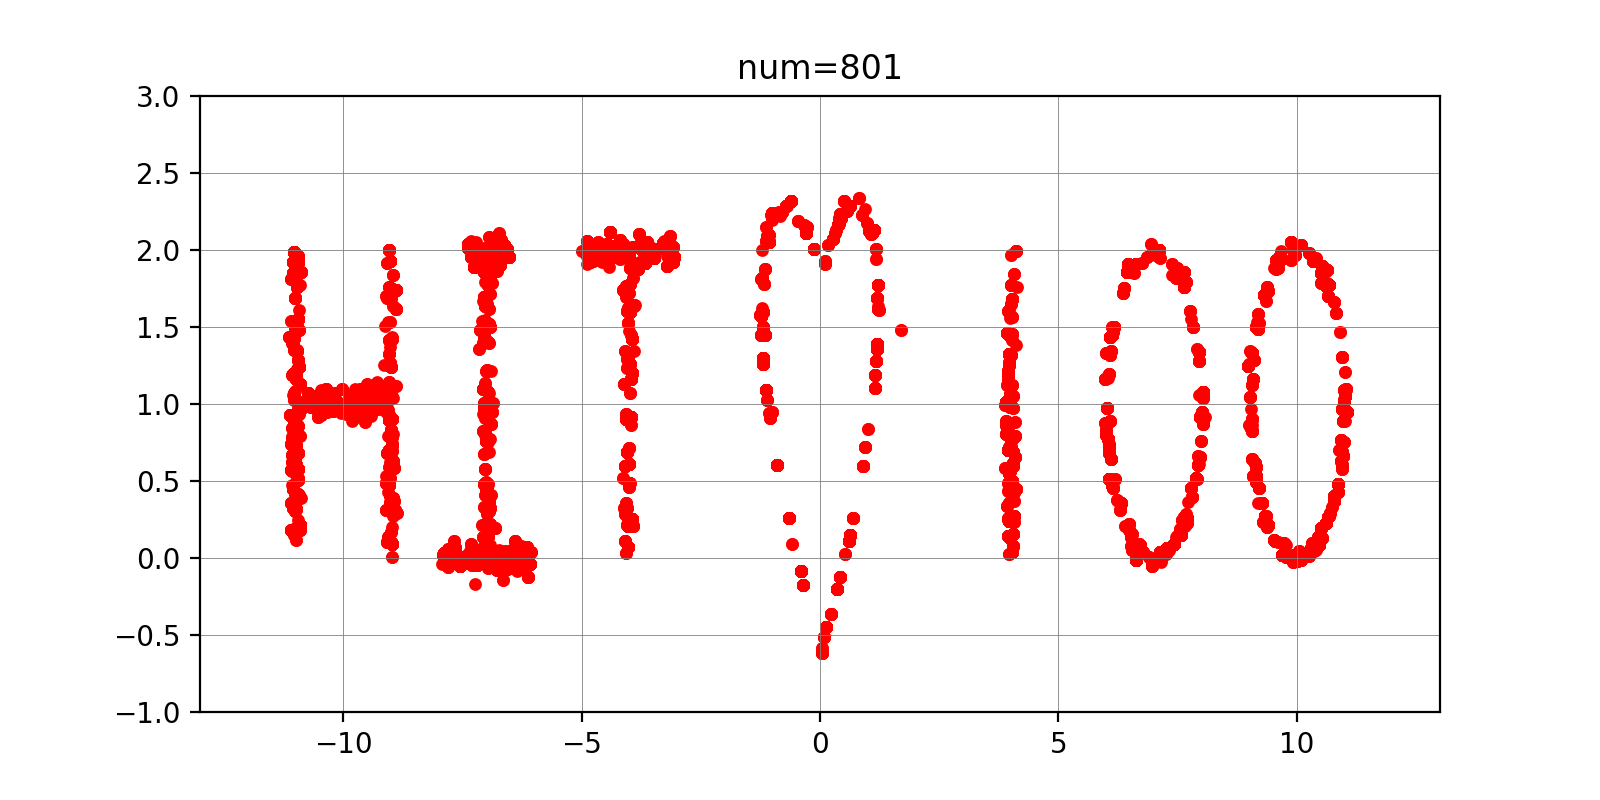

In [212]:
de = demo_mcmc(experiment_control.xs)
de.animate_moving_cluster()

In [179]:
x = np.arange(-12, 12, 0.1)
y = np.arange(3, -1, -0.1)
xx, yy = np.meshgrid(x, y)
val = []
for j in y:
    for i in x:
        val.append(post([i,j]))
val = np.array(val).reshape(xx.shape)

<IPython.core.display.Javascript object>


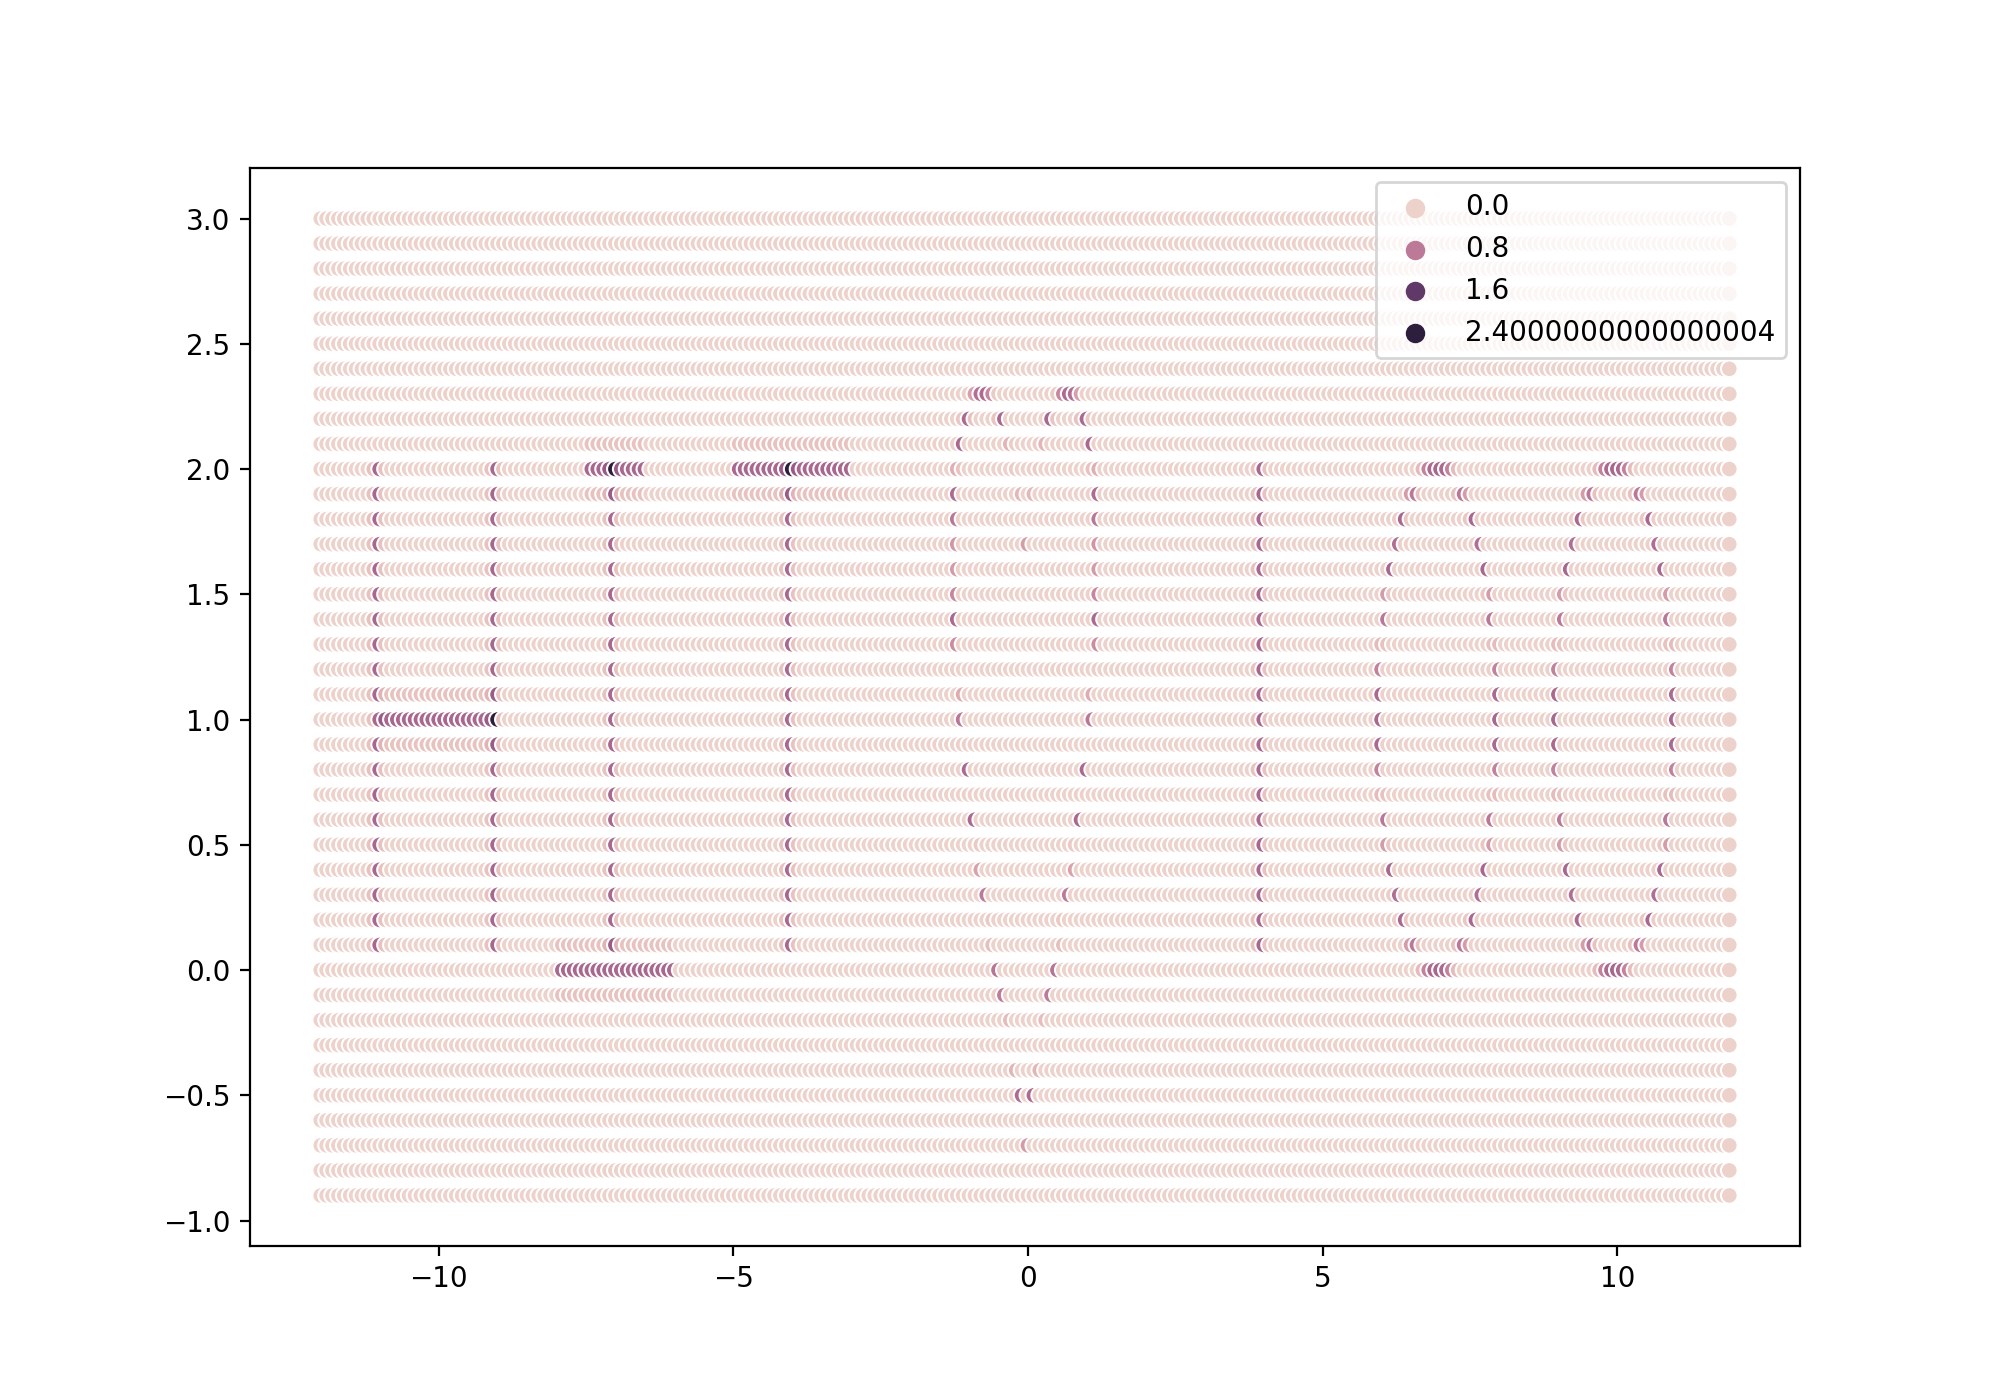

In [180]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)
sns.scatterplot(x=xx.ravel(), y=yy.ravel(), hue=val.ravel())

In [181]:
def post(x):
    """
    Defines likelihood functions
    :param x: 2D random vector
    :return: log likelihood
    """
    H_1 = -0.5 * ((x[0] + 11) ** 2) / (signoise ** 2) + np.log(0 <= x[1] < 2)
    H_2 = -0.5 * ((x[1] - 1) ** 2) / (signoise ** 2) + np.log(-11 <= x[0] < -9)
    H_3 = -0.5 * ((x[0] + 9) ** 2) / (signoise ** 2) + np.log(0 <= x[1] < 2)
    I_1= -0.5 * ((x[1] - 2) ** 2) / (signoise ** 2) + np.log(-7.5 <= x[0] < -6.5)
    I_2 = -0.5 * ((x[0] + 7) ** 2) / (signoise ** 2) + np.log(0 <= x[1] < 2)
    I_3 = -0.5 * ((x[1]) ** 2) / (signoise ** 2) + np.log(-8 <= x[0] < -6)
    T_1 = -0.5 * ((x[1] - 2) ** 2) / (signoise ** 2) + np.log(-5 <= x[0] < -3)
    T_2 = -0.5 * ((x[0] + 4) ** 2) / (signoise ** 2) + np.log(0 <= x[1] < 2)
    heart = -0.5 * ((x[1] - np.power(np.abs(x[0]),2/3) - 0.5)**2 + x[0]**2 - 1.5)**2 / (signoise ** 2)
    I = -0.5 * ((x[0] - 4) ** 2) / (signoise ** 2) + np.log(0 <= x[1] < 2)
    O1 = -0.5 * (((x[0] - 7) ** 2 + (x[1] - 1) ** 2 - 1.0) ** 2) / (signoise ** 2)
    O2 = -0.5 * (((x[0] - 10) ** 2 + (x[1] - 1) ** 2 - 1.0) ** 2) / (signoise ** 2)
    return logsumexp([H_1, H_2, H_3, I_1, I_2, I_3, T_1, T_2, heart, I, O1, O2])

In [192]:
import warnings
warnings.simplefilter("ignore")
np.random.seed(12)


D = 2
K = 4
N = 10000
p = [lambda loc: st.multivariate_normal.rvs(mean=loc, cov=np.array([[3, 0], [0, 0.5]]))] * K
u0 = st.uniform(loc=np.array([0, 0]), scale=np.array([11, 2])).rvs
Ns = 1
T_factor = 100
u = [lambda x, T=k: np.exp(post(x) / T_factor ** T) for k in range(K)]
experiment_control = ParallelTempering(D, K, N, p, u, u0, Ns)
file_simple_name = 'data/ex3/simple_csqi.obj'

val = input('Enter "y" to read data from disk, "n" to regenerate data\n')
if val == 'n':
    # generate data from Markov Chain
    _, acc = experiment_control.generateMarkovChain(mode='full PT')

else:
    # load data from disk
    experiment_control.load(file_simple_name)


Enter "y" to read data from disk, "n" to regenerate data
n


In [193]:
xs = experiment_control.xs

<IPython.core.display.Javascript object>


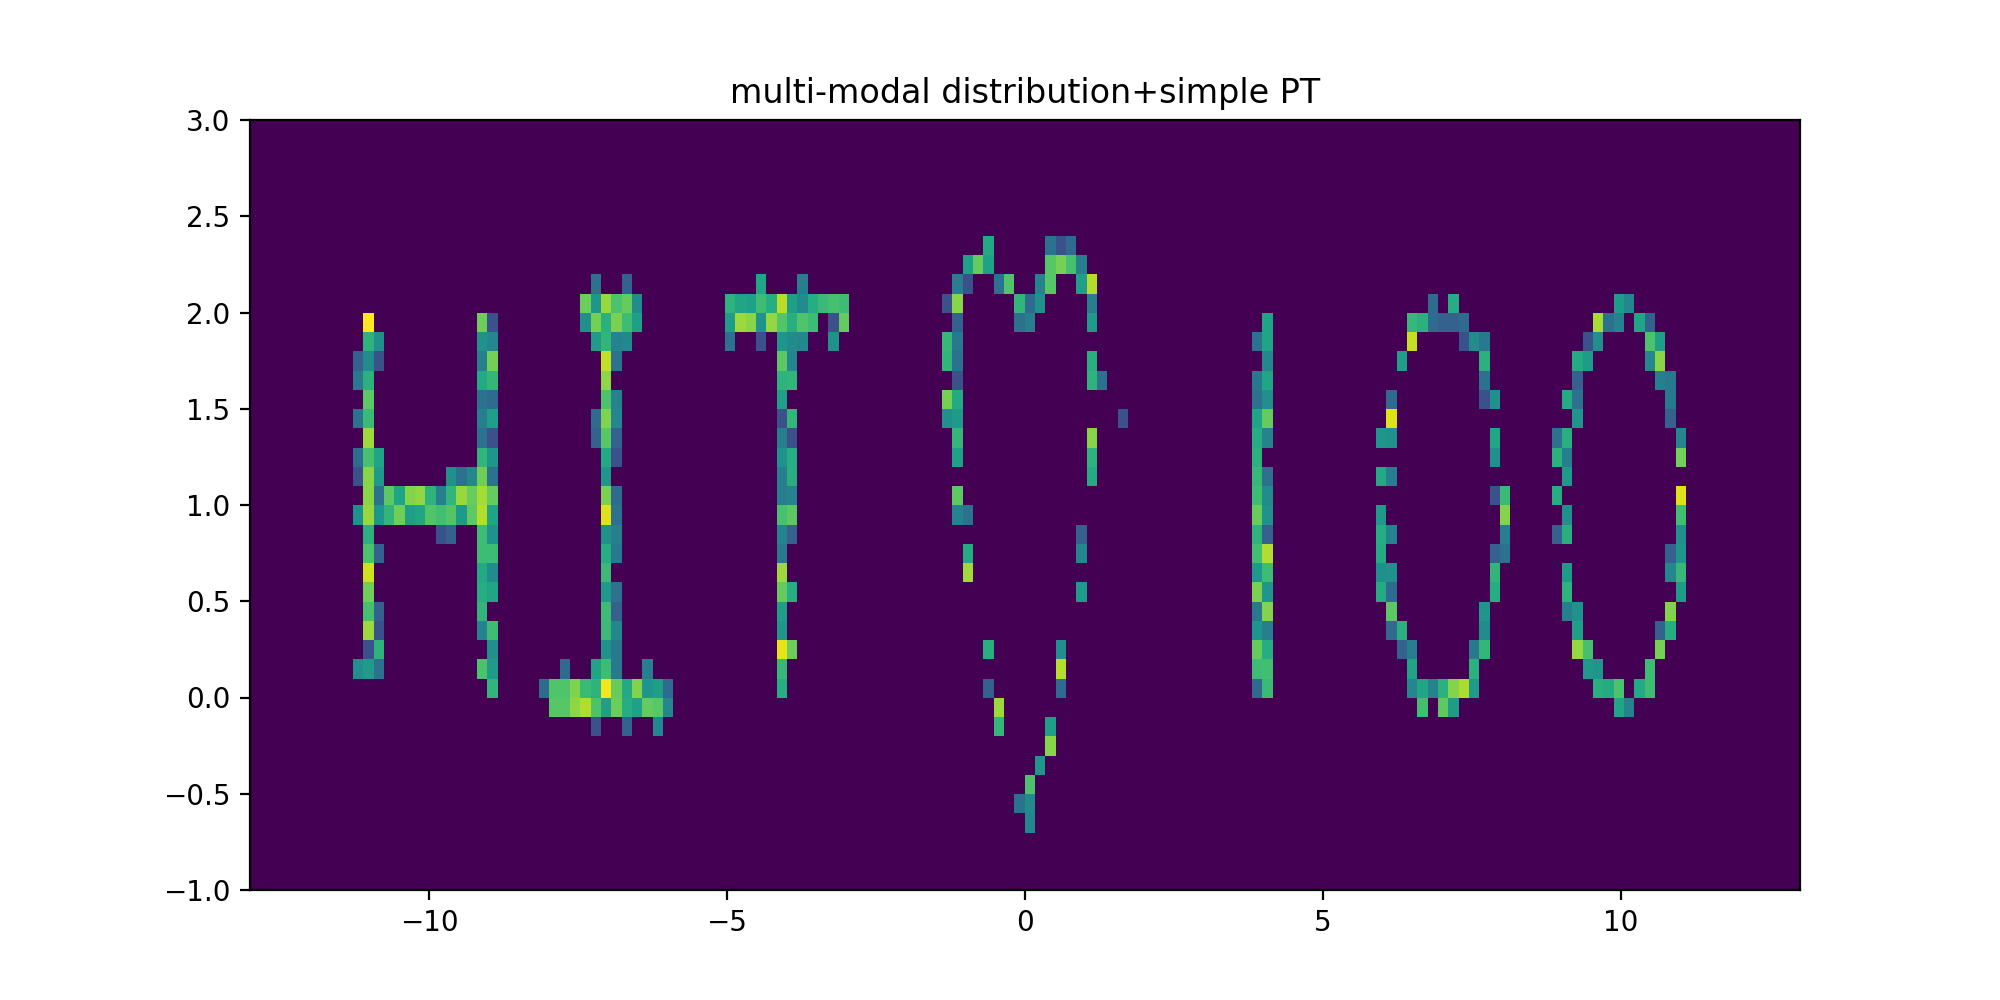

Text(0.5, 1.0, 'multi-modal distribution+simple PT')

In [194]:
# plot the histograms of samples
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
xmin, xmax = -13, 13
ymin, ymax = -1, 3
ax.hist2d(xs[:, 0], xs[:, 1], bins=[150, 40], norm=mcolors.PowerNorm(0.3),
                  range=[[xmin, xmax], [ymin, ymax]])
ax.set_title("multi-modal distribution" + '+' + "simple PT")

In [ ]:
%run -i Project_ex3.py